In [1]:
#Es necesario importas varias librerias. 
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.stats import chi2 #Se usa para analizar que tan acertada es la solución al valor actual. 
import pandas as pd #Para administrar los archivos.
import subprocess #Para ejecutar comandos
import time #Para mostrar los tiempos del proceso
from scipy.optimize import differential_evolution #Llamamos al algoritmo genético.

In [2]:
print(plt.style.available)
plt.style.use('classic')

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [3]:
import matplotlib as mpl
mpl.rcParams['xtick.major.size'] = 8
mpl.rcParams['xtick.minor.size'] = 4
mpl.rcParams['ytick.major.size'] = 8
mpl.rcParams['ytick.minor.size'] = 4

#mpl.rcParams['xtick.labelsize'] = 50
mpl.rc('text', usetex=True)
#mpl.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]
plt.rcParams['text.latex.preamble'] = r"\usepackage{bm} \usepackage{amsmath}"

In [4]:
url = "archivo_1_f1.csv"
column_names = ['logMchi1','gX','logepsilon','reliq','loglike']
### loglike means: -2log(L)
df = pd.read_csv(url,names=column_names)
df['Mchi1'] = 10**df.logMchi1
df['epsilon'] = 10**df.logepsilon
df['like'] = np.exp(-df.loglike/2)
df['MAp'] = 4*df['Mchi1']
df

,logMchi1,gX,logepsilon,reliq,loglike,Mchi1,epsilon,like,MAp
0,-1.553508,1.12,-1.160180,0.000034,7.195969,0.027957,0.069154,0.027379,0.111828
1,0.617329,1.12,-3.192912,0.041600,3.046916,4.143134,0.000641,0.217957,16.572534
2,-0.666371,1.12,-2.685164,0.000025,7.196940,0.215590,0.002065,0.027366,0.862361
3,-0.515956,1.12,-2.404014,0.000029,7.196472,0.304820,0.003944,0.027372,1.219282
4,0.895850,1.12,-3.929188,0.129000,0.037389,7.867747,0.000118,0.981479,31.470989
...,...,...,...,...,...,...,...,...,...
13395,0.879116,1.12,-3.982581,0.120000,0.000000,7.570347,0.000104,1.000000,30.281390
13396,0.878627,1.12,-5.792297,0.120000,0.000000,7.561832,0.000002,1.000000,30.247327
13397,0.877721,1.12,-1.033472,0.113000,0.023030,7.546077,0.092582,0.988551,30.184307
13398,0.877392,1.12,-4.347465,0.119000,0.000467,7.540359,0.000045,0.999767,30.161437


In [5]:
Lmax = min(df['loglike'])
ydata1 = df[(df['loglike'] - Lmax) < 5.99] ##2σ
ydata2 = df[(df['loglike'] - Lmax) < 2.30] ##1σ 
print(Lmax)

0.0


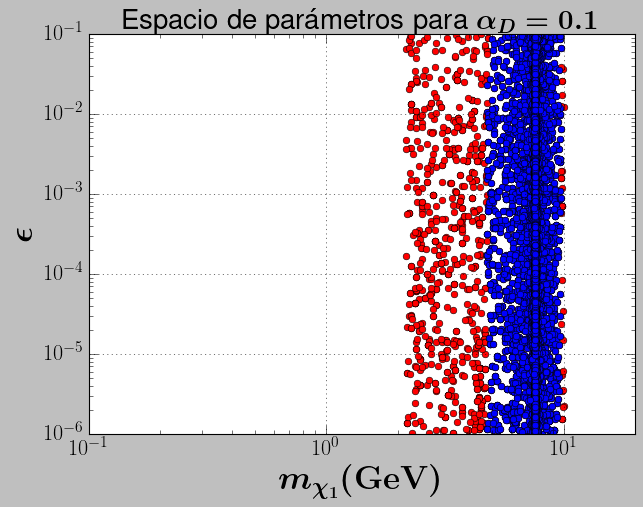

In [6]:
plt.figure(figsize=(8.2,6.5))
plt.plot(ydata1['Mchi1'],ydata1['epsilon'],'ro',label='$\phi_1$', markeredgecolor='black')
plt.plot(ydata2['Mchi1'],ydata2['epsilon'],'bo',label='$\phi_1$', markeredgecolor='black')
plt.title(r'Espacio de parámetros para $\boldsymbol{\alpha_{D} = 0.1}$',size=25)
plt.xlabel(r'$\boldsymbol{m_{\chi_{1}}\rm(GeV)}$',size=30)
plt.ylabel(r'$\boldsymbol{\epsilon}$',size=30)
plt.xscale('log')
plt.yscale('log')
plt.xlim(1e-1,2e1)
plt.ylim(1e-6,1e-1)
plt.grid()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()
plt.savefig("ep_0.1.png")

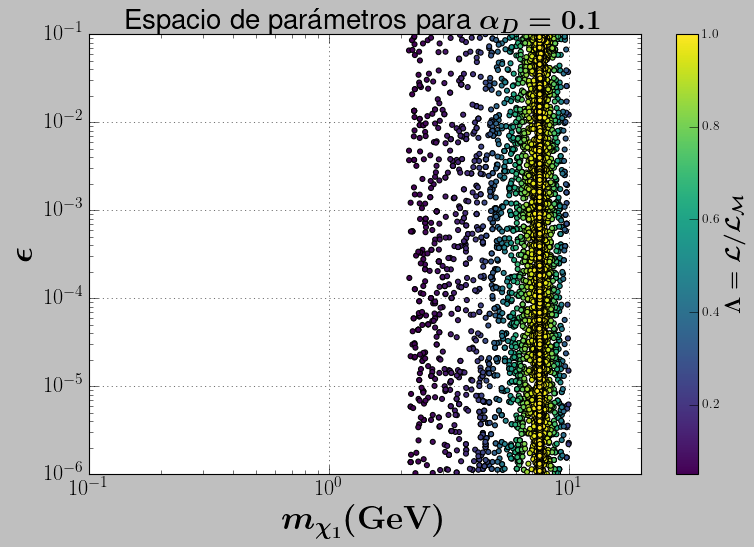

In [7]:
fig, ax = plt.subplots(figsize=(10,7))
im = ax.scatter(ydata1['Mchi1'],ydata1['epsilon'],c=ydata1['like'],cmap='viridis')
cbar = fig.colorbar(im)
cbar.set_label(r'$\boldsymbol{\Lambda = \mathcal{L} / \mathcal{L_{M}}}$', fontsize=20)  # Añade el nombre del eje de color
plt.title(r'Espacio de parámetros para $\boldsymbol{\alpha_{D} = 0.1}$',size=25)
plt.xlabel(r'$\boldsymbol{m_{\chi_{1}}\rm(GeV)}$',size=30)
plt.ylabel(r'$\boldsymbol{\epsilon}$',size=30)
plt.xscale('log')
plt.yscale('log')
plt.xlim(1e-1,2e1)
plt.ylim(1e-6,1e-1)
plt.grid()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()
plt.savefig("ratio_ep_0.1.png")

In [8]:
url = "archivo_2_f1.csv"
column_names = ['logMchi1','gX','logepsilon','reliq','loglike']
### loglike means: -2log(L)
df = pd.read_csv(url,names=column_names)
df['Mchi1'] = 10**df.logMchi1
df['epsilon'] = 10**df.logepsilon
df['like'] = np.exp(-df.loglike/2)
df['MAp'] = 4*df['Mchi1']
df

,logMchi1,gX,logepsilon,reliq,loglike,Mchi1,epsilon,like,MAp
0,-1.553508,2.5,-1.160180,0.000005,7.199414,0.027957,0.069154,0.027332,0.111828
1,0.617329,2.5,-3.192912,0.033500,3.720250,4.143134,0.000641,0.155653,16.572534
2,-0.666371,2.5,-2.685164,0.000007,7.199198,0.215590,0.002065,0.027335,0.862361
3,-0.515956,2.5,-2.404014,0.000007,7.199204,0.304820,0.003944,0.027335,1.219282
4,0.895850,2.5,-3.929188,0.123000,0.004184,7.867747,0.000118,0.997910,31.470989
...,...,...,...,...,...,...,...,...,...
13995,0.890599,2.5,-3.351904,0.120000,0.000000,7.773177,0.000445,1.000000,31.092709
13996,0.890389,2.5,-5.541798,0.120000,0.000000,7.769433,0.000003,1.000000,31.077730
13997,0.891362,2.5,-1.512556,0.050300,2.398700,7.786860,0.030722,0.301390,31.147439
13998,0.890828,2.5,-4.627456,0.120000,0.000000,7.777287,0.000024,1.000000,31.109147


In [9]:
Lmax = min(df['loglike'])
ydata1 = df[(df['loglike'] - Lmax) < 5.99] ##2σ
ydata2 = df[(df['loglike'] - Lmax) < 2.30] ##1σ 
print(Lmax)

0.0


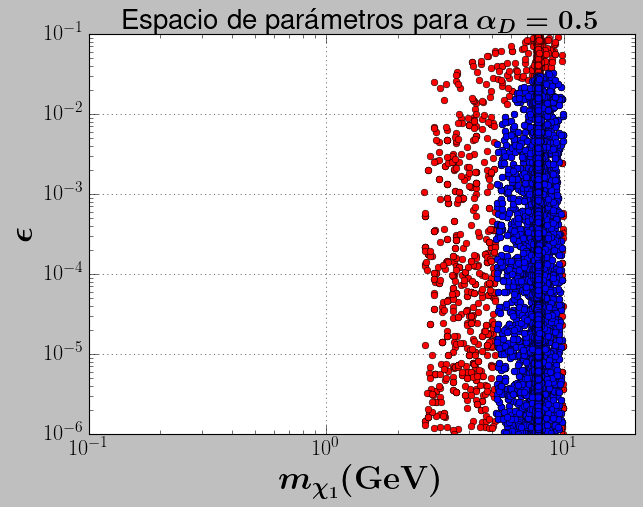

In [10]:
plt.figure(figsize=(8.2,6.5))
plt.plot(ydata1['Mchi1'],ydata1['epsilon'],'ro',label='$\phi_1$', markeredgecolor='black')
plt.plot(ydata2['Mchi1'],ydata2['epsilon'],'bo',label='$\phi_1$', markeredgecolor='black')
plt.title(r'Espacio de parámetros para $\boldsymbol{\alpha_{D} = 0.5}$',size=25)
plt.xlabel(r'$\boldsymbol{m_{\chi_{1}}\rm(GeV)}$',size=30)
plt.ylabel(r'$\boldsymbol{\epsilon}$',size=30)
plt.xscale('log')
plt.yscale('log')
plt.xlim(1e-1,2e1)
plt.ylim(1e-6,1e-1)
plt.grid()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()
plt.savefig("ep_0.5.png")

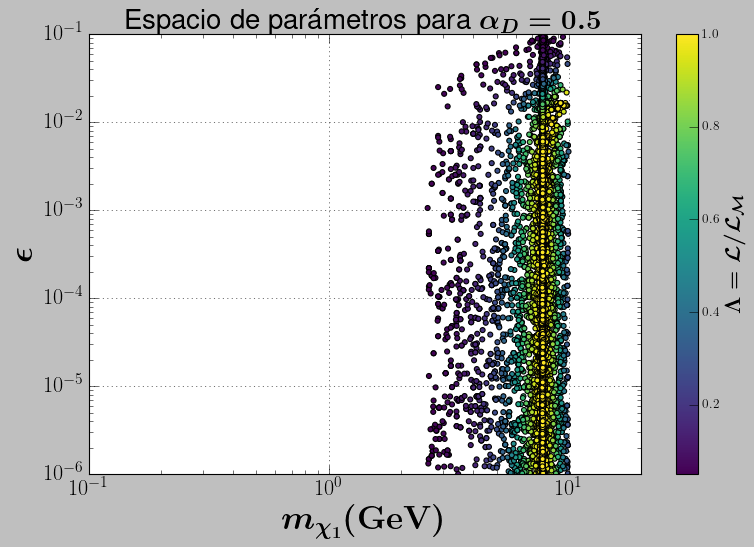

In [11]:
fig, ax = plt.subplots(figsize=(10,7))
im = ax.scatter(ydata1['Mchi1'],ydata1['epsilon'],c=ydata1['like'],cmap='viridis')
cbar = fig.colorbar(im)
cbar.set_label(r'$\boldsymbol{\Lambda = \mathcal{L} / \mathcal{L_{M}}}$', fontsize=20)  # Añade el nombre del eje de color
plt.title(r'Espacio de parámetros para $\boldsymbol{\alpha_{D} = 0.5}$',size=25)
plt.xlabel(r'$\boldsymbol{m_{\chi_{1}}\rm(GeV)}$',size=30)
plt.ylabel(r'$\boldsymbol{\epsilon}$',size=30)
plt.xscale('log')
plt.yscale('log')
plt.xlim(1e-1,2e1)
plt.ylim(1e-6,1e-1)
plt.grid()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()
plt.savefig("ratio_ep_0.5.png")